# Enunciado

En este enlace puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Cargamos los datos
df = pd.read_csv("csv/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Correlación de las variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


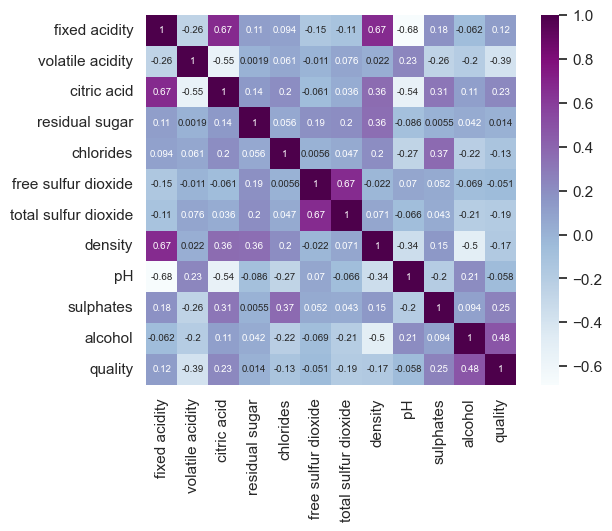

In [3]:
sns.set()
sns.heatmap(df.corr(), square=True, annot=True, cmap='BuPu', annot_kws={'size': 7})
"""
annot_kws sirve para cambiar el tamaño de la letra de los valores de la matriz
"""
df.corr()

## Ajuste de los nombres de las variables

In [4]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
              'quality']
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Entrenamiento y test

In [5]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## NaiveBayes (GaussianNB)

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5303030303030303

## kNN

max value: 0.5294 with 1 neighbors
max value: 0.5966 with 17 neighbors


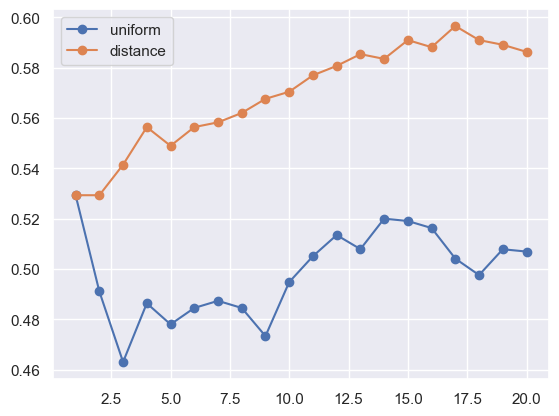

In [7]:
MAX_NEIGHBORDS = 20
MIN_NEIGHBORDS = 1
N_SPLITS = 5

cv = KFold(n_splits = N_SPLITS, shuffle = False)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []

    for n_neighbors in range(MIN_NEIGHBORDS,MAX_NEIGHBORDS+1):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]

            # entrenamiento y ejecución del modelo
            knn.fit(X = f_train.drop(['quality'], axis=1),
                            y = f_train['quality'])
            y_pred = knn.predict(X = f_test.drop(['quality'], axis = 1))

            # evaluación del modelo
            acc = accuracy_score(f_test['quality'], y_pred)
            fold_accuracy.append(acc)

        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

    plt.plot(range(MIN_NEIGHBORDS,MAX_NEIGHBORDS+1), total_scores, marker='o', label=weights)
    print('max value: {:.4f} with {} neighbors'.format(max(total_scores), total_scores.index(max(total_scores))+1))
    
plt.legend()
plt.show()

In [10]:
# Seleccionamos la distancia como peso y 3 vecinos
n_neighbors = 17
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)

# Entrenamiento y ejecución del modelo
knn.fit(X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.6003787878787878


## Matriz de confusión

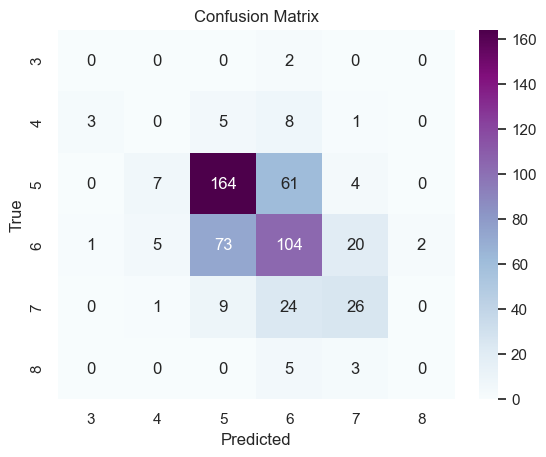

In [9]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
classes = ['3', '4', '5', '6', '7', '8'] 
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()